# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
# import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


74

In [12]:
print(lat_lngs)

In [13]:
len(lats)

100

In [14]:
len(lngs)

100

In [15]:
coordinates_df = pd.DataFrame({'Latitude': lats, 'Longitude': lngs})
coordinates_df.tail()

,Latitude,Longitude
95,50.693946,173.825357
96,57.657585,-141.336431
97,-34.968529,-131.769458
98,-9.202230,68.604756
99,-23.347443,-108.644453


In [16]:
cities_df = pd.DataFrame({'City': cities})
cities_df.tail()

,City
69,illoqqortoormiut
70,bara
71,shimoda
72,alofi
73,nikolskoye


In [17]:
cities_weather = cities_df.copy()
cities_weather.head()

,City
0,busselton
1,barentsburg
2,qaanaaq
3,port elizabeth
4,tasiilaq


In [18]:
#setting up additional columns in dataframe
cities_weather ['Country'] = ""
cities_weather ['Date'] = ""
cities_weather ['Latitude'] = ""
cities_weather ['Longitude'] = ""
cities_weather ['Cloudiness'] = ""
cities_weather ['Max_Temp'] = ""
cities_weather ['Humidity'] = ""
cities_weather ['Wind_Speed'] = ""

cities_weather.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,busselton,,,,,,,,
1,barentsburg,,,,,,,,
2,qaanaaq,,,,,,,,
3,port elizabeth,,,,,,,,
4,tasiilaq,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# import openweathermapy.core as owm
# Base url and define units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Query url
query_url = f"{url}appid={api_key}&units={units}&q="

# use iterrows to iterate through pandas dataframe
for index, row in cities_weather.iterrows():
    print(index)

    cityrow = row['City']
    
    try:
        response = requests.get(query_url + cityrow).json()
        pprint(response)

        results = response

        cities_weather.loc[index, 'Country'] = results['sys']['country']
        cities_weather.loc[index, 'Date'] = results['dt']
        cities_weather.loc[index, 'Latitude'] = results['coord']['lat']
        cities_weather.loc[index, 'Longitude'] = results['coord']['lon']
        cities_weather.loc[index, 'Cloudiness'] = results['clouds']['all']
        cities_weather.loc[index, 'Max_Temp'] = results['main']['temp_max']
        cities_weather.loc[index, 'Humidity'] = results['main']['humidity']
        cities_weather.loc[index, 'Wind_Speed'] = results['wind']['speed']
        print()
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
        print("------------")


0
{'base': 'stations',
 'clouds': {'all': 8},
 'cod': 200,
 'coord': {'lat': -33.64, 'lon': 115.35},
 'dt': 1554337739,
 'id': 2075265,
 'main': {'humidity': 56,
          'pressure': 1008,
          'temp': 61.88,
          'temp_max': 66,
          'temp_min': 59},
 'name': 'Busselton',
 'sys': {'country': 'AU',
         'id': 2011706,
         'message': 0.004,
         'sunrise': 1554330731,
         'sunset': 1554372661,
         'type': 3},
 'weather': [{'description': 'clear sky',
              'icon': '02d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 231.001, 'speed': 19.26}}

1
{'cod': '404', 'message': 'city not found'}
City not found... skipping.
------------
2
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 77.48, 'lon': -69.36},
 'dt': 1554337633,
 'id': 3831208,
 'main': {'grnd_level': 956.45,
          'humidity': 82,
          'pressure': 988.64,
          'sea_level': 988.64,
          'temp': 10.22,
         

{'base': 'stations',
 'clouds': {'all': 64},
 'cod': 200,
 'coord': {'lat': 42.18, 'lon': 127.48},
 'dt': 1554337833,
 'id': 2034691,
 'main': {'grnd_level': 915.97,
          'humidity': 33,
          'pressure': 1006.72,
          'sea_level': 1006.72,
          'temp': 46.58,
          'temp_max': 46.58,
          'temp_min': 46.58},
 'name': 'Songjianghe',
 'sys': {'country': 'CN',
         'message': 0.0033,
         'sunrise': 1554325724,
         'sunset': 1554371847},
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 228.001, 'speed': 11.54}}

17
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -9.8, 'lon': -139.03},
 'dt': 1554337755,
 'id': 4020109,
 'main': {'grnd_level': 1010.93,
          'humidity': 100,
          'pressure': 1010.96,
          'sea_level': 1010.96,
          'temp': 81.86,
          'temp_max': 81.86,
          'temp_min': 81.86}

         'id': 7873,
         'message': 0.0044,
         'sunrise': 1554308880,
         'sunset': 1554353562,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 50, 'speed': 11.41}}

31
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -53.16, 'lon': -70.91},
 'dt': 1554337349,
 'id': 3874787,
 'main': {'humidity': 75,
          'pressure': 991,
          'temp': 41,
          'temp_max': 41,
          'temp_min': 41},
 'name': 'Punta Arenas',
 'sys': {'country': 'CL',
         'id': 8487,
         'message': 0.0041,
         'sunrise': 1554289772,
         'sunset': 1554330243,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 310, 'speed': 12.75}}

32
{'base': 'stations',
 'clo

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 33.3, 'lon': 44.38},
 'dt': 1554332400,
 'id': 98182,
 'main': {'humidity': 71,
          'pressure': 1014,
          'temp': 57.2,
          'temp_max': 57.2,
          'temp_min': 57.2},
 'name': 'Baghdad',
 'sys': {'country': 'IQ',
         'id': 7597,
         'message': 0.004,
         'sunrise': 1554346009,
         'sunset': 1554391442,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 330, 'speed': 11.41}}

48
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 65.58, 'lon': -170.99},
 'dt': 1554337841,
 'id': 4031637,
 'main': {'grnd_level': 1014.93,
          'humidity': 100,
          'pressure': 1019.16,
          'sea_level': 1019.16,
          'temp': 24.98,
          'temp_max': 24.98,
          'temp_min': 24.98},
 'name': 'Lavrentiya',

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 65.28, 'lon': -126.83},
 'dt': 1554336000,
 'id': 6089245,
 'main': {'humidity': 55,
          'pressure': 1028,
          'temp': 6.8,
          'temp_max': 6.8,
          'temp_min': 6.8},
 'name': 'Norman Wells',
 'sys': {'country': 'CA',
         'id': 951,
         'message': 0.0044,
         'sunrise': 1554298525,
         'sunset': 1554348326,
         'type': 1},
 'visibility': 48279,
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 290, 'gust': 10.3, 'speed': 14.99}}

62
{'base': 'stations',
 'clouds': {'all': 56},
 'cod': 200,
 'coord': {'lat': 52.34, 'lon': 124.71},
 'dt': 1554337844,
 'id': 2034615,
 'main': {'grnd_level': 943.33,
          'humidity': 68,
          'pressure': 1006.6,
          'sea_level': 1006.6,
          'temp': 27.68,
          'temp_max': 27.68,
          'temp_min': 27.68

In [20]:
cities_weather.tail()

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
69,illoqqortoormiut,,,,,,,,
70,bara,NG,1554337846,10.41,10.6,0,76.19,24,8.63
71,shimoda,JP,1554337511,34.7,138.93,20,55.99,50,3.36
72,alofi,NU,1554336000,-19.06,-169.92,75,82.4,74,12.75
73,nikolskoye,RU,1554337836,59.7,30.79,0,35.6,31,6.71


In [23]:
cities_weather_final = cities_weather.loc[cities_weather["Country"] != ""]
cities_weather_final.reset_index(inplace=True,drop=True)

cities_weather_final

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,busselton,AU,1554337739,-33.64,115.35,8,66,56,19.26
1,qaanaaq,GL,1554337633,77.48,-69.36,88,10.22,82,6.62
2,port elizabeth,US,1554337761,39.31,-74.98,1,62.6,25,11.41
3,tasiilaq,GL,1554335400,65.61,-37.64,44,32,83,4.7
4,jati,PK,1554337282,24.35,68.27,0,72.23,88,7.63
5,naze,NG,1554332400,5.43,7.07,20,82.4,88,3.36
6,cherskiy,RU,1554337765,68.75,161.3,0,29.93,75,2.26
7,airai,TL,1554337832,-8.93,125.41,80,74.03,73,1.14
8,butaritari,KI,1554337775,3.07,172.79,88,78.26,100,2.48
9,cape town,ZA,1554337391,-33.93,18.42,20,59,82,5.82


In [24]:
# # Drop rows with any empty cells
# cities_weather.dropna(axis=0, how='any', inplace=True)
# cities_weather

# df = df.astype({"a": int, "b": complex})
cities_weather_final_format = cities_weather_final.infer_objects()
cities_weather_final_format

,City,Country,Date,Latitude,Longitude,Cloudiness,Max_Temp,Humidity,Wind_Speed
0,busselton,AU,1554337739,-33.64,115.35,8,66.00,56,19.26
1,qaanaaq,GL,1554337633,77.48,-69.36,88,10.22,82,6.62
2,port elizabeth,US,1554337761,39.31,-74.98,1,62.60,25,11.41
3,tasiilaq,GL,1554335400,65.61,-37.64,44,32.00,83,4.70
4,jati,PK,1554337282,24.35,68.27,0,72.23,88,7.63
5,naze,NG,1554332400,5.43,7.07,20,82.40,88,3.36
6,cherskiy,RU,1554337765,68.75,161.30,0,29.93,75,2.26
7,airai,TL,1554337832,-8.93,125.41,80,74.03,73,1.14
8,butaritari,KI,1554337775,3.07,172.79,88,78.26,100,2.48
9,cape town,ZA,1554337391,-33.93,18.42,20,59.00,82,5.82


In [25]:
cities_weather_final_format.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
City          64 non-null object
Country       64 non-null object
Date          64 non-null int64
Latitude      64 non-null float64
Longitude     64 non-null float64
Cloudiness    64 non-null int64
Max_Temp      64 non-null float64
Humidity      64 non-null int64
Wind_Speed    64 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ KB


In [26]:
cities_weather_final_format.count()

City          64
Country       64
Date          64
Latitude      64
Longitude     64
Cloudiness    64
Max_Temp      64
Humidity      64
Wind_Speed    64
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
cities_weather_final_format.to_csv('cities_weather.csv',index=False)

In [28]:
cities_weather_final_format.dtypes

City           object
Country        object
Date            int64
Latitude      float64
Longitude     float64
Cloudiness      int64
Max_Temp      float64
Humidity        int64
Wind_Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [29]:
x = cities_weather_final_format["Latitude"]
y_temp = cities_weather_final_format["Max_Temp"]
y_cloud = cities_weather_final_format["Cloudiness"]
y_wind = cities_weather_final_format["Wind_Speed"]
y_hum = cities_weather_final_format["Humidity"]

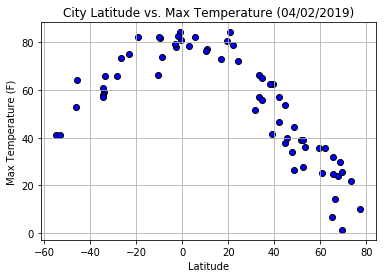

<Figure size 432x288 with 0 Axes>

In [32]:
plt.scatter(x,y_temp, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
plt.title("City Latitude vs. Max Temperature (04/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.savefig('Lat_vs_MTemp')

#### Latitude vs. Humidity Plot

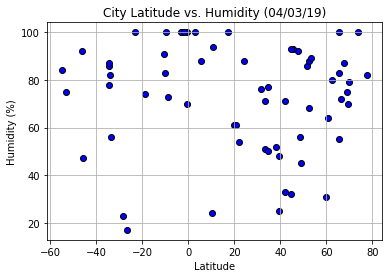

<Figure size 432x288 with 0 Axes>

In [40]:
plt.scatter(x,y_hum, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
# plt.title("City Latitude vs. Humidity (%s) % time.strftime("%x")")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.savefig('Lat_vs_Hum')



#### Latitude vs. Cloudiness Plot

In [ ]:
# plt.scatter(cities_weather["Latitude"],cities_weather["Cloudiness"], marker = "o", color="blue", 
#             linewidth=1, markersize=5)
# plt.title("City Latitude vs. Cloudiness (04/02/2019)")
# plt.xlabel("Latitude")
# plt.ylabel("Cloudiness (%)")
# plt.grid()
# plt.show()
# plt.savefig('Lat_vs_Cloudiness')


#### Latitude vs. Wind Speed Plot

In [ ]:
# plt.scatter(cities_weather["Latitude"],cities_weather["Wind_Speed"], marker = "o", color="blue", 
#             linewidth=1, markersize=5)
# plt.title("City Latitude vs. Wind Speed (04/02/2019)")
# plt.xlabel("Latitude")
# plt.ylabel("Wind Speed (mph)")
# plt.grid()
# plt.show()
# plt.savefig('Lat_vs_Wind_Speed')
